In [27]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sn
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
import os 
os.listdir('./')

['.idea',
 '.ipynb_checkpoints',
 'data',
 'data_analysis.ipynb',
 'data_analysis.py',
 'Data_analysis_interpret.md',
 'jinnan_round1_submit_20181227.csv',
 'jinnan_round1_testA_20181227.csv',
 'jinnan_round1_train_20181227.csv',
 '我们.csv']

In [3]:
df_train = pd.read_csv('./jinnan_round1_train_20181227.csv', encoding='gbk')
df_test = pd.read_csv('./jinnan_round1_testA_20181227.csv', encoding='gbk')

In [4]:
print(f"the train data shape is:{df_train.shape}")
print(f"the test data shape is:{df_test.shape}")

the train data shape is:(1396, 44)
the test data shape is:(150, 43)


In [28]:
df_train.head()

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,收率
0,sample_1528,300,NaN,405.0,700,13:30:00,38.0,NaN,NaN,15:30:00,100,16:30:00,102,0.2,17:30:00,103.0,18:30:00,104.0,0.2,300,21:00-21:30,50.0,9.0,5.0,22:00:00,75,22:30:00,70,6:30-7:00,350.0,3.5,3.5,7:00-8:00,8:00:00,65,11:30:00,45.0,11:30-13:00,14:00-15:30,NaN,800.0,0.15,400,0.879
1,sample_1698,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,101,17:00:00,103,0.2,18:00:00,104.0,19:00:00,105.0,0.2,200,19:00-20:00,50.0,9.0,5.0,20:00:00,80,21:00:00,73,21:00-22:00,320.0,3.5,3.5,22:00-23:00,23:00:00,80,6:00:00,45.0,6:00-7:30,7:30-9:00,9:00-10:00,1200.0,0.15,400,0.902
2,sample_639,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,102,17:00:00,103,0.2,18:00:00,104.0,19:00:00,105.0,0.2,200,19:00-19:30,50.0,9.0,5.0,20:00:00,79,21:00:00,73,21:00-22:00,320.0,3.5,3.5,22:00-23:00,23:00:00,80,1:00:00,45.0,1:00-2:30,2:30-4:00,4:00-5:00,1200.0,0.15,400,0.936
3,sample_483,300,NaN,405.0,700,1:30:00,38.0,NaN,NaN,3:00:00,100,4:00:00,102,0.2,5:00:00,103.0,6:00:00,104.0,0.2,200,6:30-7:00,50.0,10.0,5.0,7:30:00,70,8:00:00,78,13:30-14:30,290.0,3.5,3.5,14:30-15:30,15:30:00,65,18:00:00,45.0,19:00-20:30,21:30-23:00,NaN,800.0,0.15,400,0.902
4,sample_617,300,NaN,405.0,700,22:00:00,29.0,NaN,NaN,0:00:00,101,1:00:00,103,0.2,2:00:00,104.0,3:00:00,105.0,0.2,200,3:00-4:00,50.0,9.0,5.0,4:00:00,80,5:00:00,73,5:00-6:00,320.0,3.5,3.5,6:00-7:00,7:00:00,80,9:00:00,45.0,9:00-10:30,10:30-12:00,12:00-13:00,1200.0,0.15,420,0.983


In [30]:
flag = '收率'

In [29]:
df_test['收率'] = 0
df_test.head()

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,收率
0,sample_1656,300,NaN,405.0,700,6:00:00,29,NaN,NaN,8:00:00,101,9:00:00,103.0,0.2,10:00:00,105.0,11:00:00,106.0,0.2,200,11:00-12:00,50,9,5,12:00:00,80.0,13:00:00,73.0,13:00-14:00,320.0,3.5,3.5,14:00-15:00,15:00:00,79,17:00:00,45,17:00-18:30,18:30-20:00,20:00-21:00,1200,0.15,400,0
1,sample_1548,300,NaN,405.0,700,12:30:00,39,12:50:00,80.0,14:20:00,100,15:20:00,102.0,0.2,16:20:00,103.0,17:20:00,102.0,0.2,300,20:00-20:30,50,9,5,21:00:00,76.0,21:30:00,75.0,6:00-6:30,350.0,3.5,3.5,6:30-7:50,7:50:00,65,10:00:00,45,12:00-13:00,14:00-15:30,NaN,800,0.15,385,0
2,sample_769,300,NaN,405.0,700,6:00:00,80,NaN,NaN,8:00:00,102,9:00:00,104.0,0.2,10:00:00,104.0,11:00:00,105.0,0.2,200,11:00-12:00,50,9,5,12:00:00,80.0,13:00:00,73.0,13:00-14:00,320.0,3.5,3.5,14:00-15:00,15:00:00,80,17:00:00,45,17:00-20:00,NaN,NaN,1200,0.15,440,0
3,sample_1881,300,NaN,405.0,700,22:00:00,29,NaN,NaN,0:00:00,102,1:00:00,103.0,0.2,2:00:00,104.0,3:00:00,105.0,0.2,200,3:00-4:00,50,9,5,4:00:00,78.0,5:00:00,73.0,5:00-6:00,320.0,3.5,3.5,6:00-7:00,7:00:00,80,9:00:00,45,9:00-10:30,10:30-12:00,12:00-13:00,1200,0.15,400,0
4,sample_1807,300,NaN,405.0,700,22:00:00,30,NaN,NaN,0:00:00,101,1:00:00,104.0,0.2,2:00:00,106.0,3:00:00,107.0,0.2,200,3:00-4:00,50,9,5,4:00:00,79.0,5:00:00,72.0,5:00-6:00,320.0,3.5,3.5,6:00-7:00,7:00:00,79,9:00:00,45,9:00-10:30,10:30-12:00,12:00-13:00,1200,0.15,400,0


In [7]:
df_train.columns

Index(['样本id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13',
       'B14', '收率'],
      dtype='object')

In [9]:
df_all = df_train.append(df_test).reset_index(drop=True)

In [10]:
df_all.shape

(1546, 44)

# 查看train行与列的缺失率,以及label的直方图

In [13]:
train_loss_columns = (1 - df_train.count() /df_train.shape[0]).reset_index()
train_loss_columns.columns = ['columns_name', 'loss_ratio']

In [14]:
test_loss_columns = (1 - df_test.count() /df_test.shape[0]).reset_index()
test_loss_columns.columns = ['columns_name', 'loss_ratio']

In [15]:
train_loss_sample = (1 - df_train.count(axis=1) /df_train.shape[1]).reset_index()
train_loss_sample.columns = ['samples', 'loss_ratio']

In [16]:
test_loss_sample = (1 - df_test.count(axis=1) /df_test.shape[1]).reset_index()
test_loss_sample.columns = ['samples', 'loss_ratio']

In [22]:
print(train_loss_columns.shape, test_loss_columns.shape)
print(train_loss_sample.shape, test_loss_sample.shape)

(44, 2) (44, 2)
(1396, 2) (150, 2)


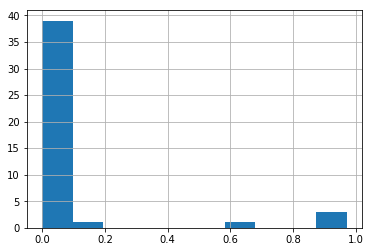

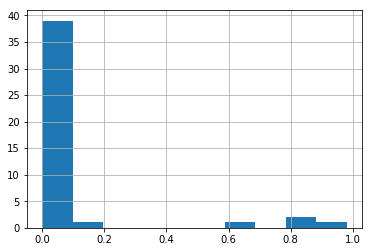

In [26]:
train_loss_columns.loss_ratio.hist()
plt.show()
test_loss_columns.loss_ratio.hist()

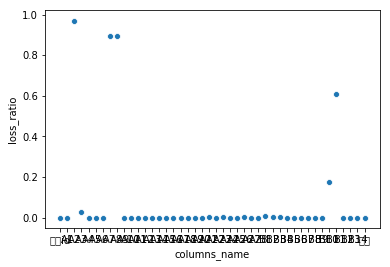

the test columns loss distribute


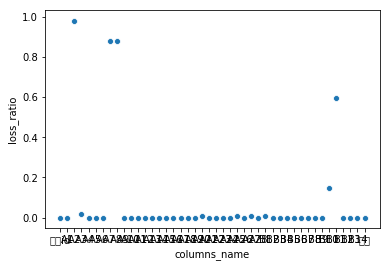

In [23]:
%matplotlib inline
sn.scatterplot(x=train_loss_columns.columns_name, y=train_loss_columns.loss_ratio)
plt.show()
print("the test columns loss distribute")
sn.scatterplot(x=test_loss_columns.columns_name, y=test_loss_columns.loss_ratio)
plt.show()

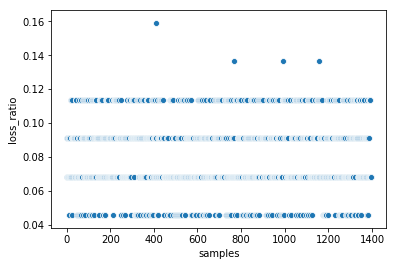

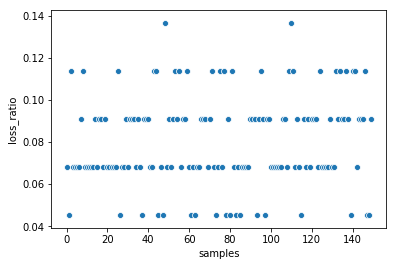

In [24]:
sn.scatterplot(x=train_loss_sample.samples, y=train_loss_sample.loss_ratio)
plt.show()
sn.scatterplot(x=test_loss_sample.samples, y=test_loss_sample.loss_ratio)
plt.show()

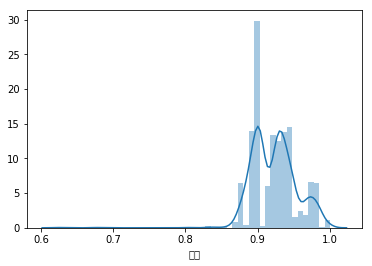

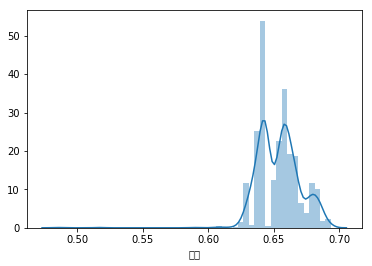

In [37]:
sn.distplot(df_train['收率'])
plt.show()
sn.distplot(np.log1p(df_train['收率']))

In [40]:
os.listdir('./data')

['dataset_2.csv']

In [41]:
static_data = pd.read_csv('./data/dataset_2.csv')

In [42]:
static_data.head()

,index_code,date,open,close,low,high,volume,money,change,label
0,sh000001,1990/12/20,104.30,104.39,99.98,104.39,197000.0,85000.0,0.044109,109.13
1,sh000001,1990/12/21,109.07,109.13,103.73,109.13,28000.0,16100.0,0.045407,114.55
2,sh000001,1990/12/24,113.57,114.55,109.13,114.55,32000.0,31100.0,0.049666,120.25
3,sh000001,1990/12/25,120.09,120.25,114.55,120.25,15000.0,6500.0,0.049760,125.27
4,sh000001,1990/12/26,125.27,125.27,120.25,125.27,100000.0,53700.0,0.041746,125.28


In [51]:
train_loss_columns

,columns_name,loss_ratio
0,样本id,0.000000
1,A1,0.000000
2,A2,0.969914
3,A3,0.030086
4,A4,0.000000
5,A5,0.000000
6,A6,0.000000
7,A7,0.893266
8,A8,0.893266
9,A9,0.000000


# 分析时间与flag的关系

In [31]:
flag = '收率'

In [32]:
df_train[df_train[flag] == 1]

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,收率


In [47]:
df_train[df_train[flag] > 0.97]

,样本id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,收率
4,sample_617,300,NaN,405.0,700,22:00:00,29.0,NaN,NaN,0:00:00,101,1:00:00,103,0.2,2:00:00,104.0,3:00:00,105.0,0.2,200,3:00-4:00,50.0,9.0,5.0,4:00:00,80,5:00:00,73,5:00-6:00,320.0,3.50,3.5,6:00-7:00,7:00:00,80,9:00:00,45.0,9:00-10:30,10:30-12:00,12:00-13:00,1200.0,0.15,420,0.9830
16,sample_1736,300,NaN,405.0,700,6:00:00,29.0,NaN,NaN,8:00:00,102,9:00:00,103,0.2,10:00:00,105.0,11:00:00,107.0,0.2,200,11:00-12:00,50.0,9.0,5.0,12:00:00,80,13:00:00,72,13:00-14:00,320.0,3.50,3.5,14:00-15:00,15:00:00,80,17:00:00,45.0,17:00-18:30,18:30-20:00,20:00-21:00,1200.0,0.15,420,0.9710
25,sample_72,300,NaN,405.0,700,22:00:00,30.0,NaN,NaN,0:00:00,101,1:00:00,103,0.2,2:00:00,105.0,3:00:00,107.0,0.2,200,3:00-4:00,50.0,9.0,5.0,4:00:00,80,5:00:00,72,5:00-6:00,320.0,3.50,3.5,6:00-7:00,7:00:00,78,9:00:00,45.0,9:00-10:30,10:30-12:00,12:00-13:00,1200.0,0.15,420,0.9710
32,sample_1818,300,NaN,405.0,700,14:00:00,29.0,NaN,NaN,16:00:00,102,17:00:00,103,0.2,18:00:00,104.0,19:00:00,105.0,0.2,200,19:00-20:00,50.0,9.0,5.0,20:00:00,80,21:00:00,73,21:00-22:00,320.0,3.50,3.5,22:00-23:00,23:00:00,80,1:00:00,45.0,1:00-2:30,2:30-4:00,4:00-5:00,1200.0,0.15,420,0.9830
42,sample_673,300,NaN,405.0,700,22:00:00,29.0,NaN,NaN,0:00:00,101,1:00:00,103,0.2,2:00:00,104.0,3:00:00,105.0,0.2,200,3:00-4:00,50.0,9.0,5.0,4:00:00,80,5:00:00,73,5:00-6:00,320.0,3.50,3.5,6:00-7:00,7:00:00,80,9:00:00,45.0,9:00-10:30,10:30-12:00,12:00-13:00,1200.0,0.15,420,0.9830
53,sample_1175,300,NaN,405.0,700,22:00:00,29.0,NaN,NaN,0:00:00,101,1:00:00,103,0.2,2:00:00,104.0,3:00:00,105.0,0.2,200,3:00-4:00,50.0,9.0,5.0,4:00:00,80,5:00:00,73,5:00-6:00,320.0,3.50,3.5,6:00-7:00,7:00:00,80,9:00:00,45.0,9:00-10:30,10:30-12:00,12:00-13:00,1200.0,0.15,420,0.9830
54,sample_219,300,NaN,405.0,700,14:00:00,30.0,NaN,NaN,16:00:00,100,17:00:00,104,0.2,18:00:00,106.0,19:00:00,107.0,0.2,200,19:00-20:00,50.0,9.0,5.0,20:00:00,80,21:00:00,73,21:00-22:00,320.0,3.50,3.5,22:00-23:00,23:00:00,80,1:00:00,45.0,1:00-2:30,2:30-4:00,4:00-5:00,1200.0,0.15,420,0.9710
64,sample_1289,300,NaN,405.0,700,14:00:00,27.0,NaN,NaN,16:00:00,102,17:00:00,104,0.2,18:00:00,105.0,19:00:00,106.0,0.2,200,19:00-20:00,50.0,9.0,5.0,20:00:00,80,21:00:00,73,21:00-22:00,320.0,3.50,3.5,22:00-23:00,23:00:00,80,0:00:00,45.0,0:00-4:00,NaN,NaN,1200.0,0.15,460,0.9980
87,sample_643,300,NaN,405.0,700,22:00:00,29.0,NaN,NaN,0:00:00,102,1:00:00,103,0.2,2:00:00,104.0,3:00:00,105.0,0.2,200,3:00-4:00,50.0,9.0,5.0,4:00:00,78,5:00:00,73,5:00-6:00,320.0,3.50,3.5,6:00-7:00,7:00:00,80,9:00:00,45.0,9:00-10:30,10:30-12:00,22:00-12:00,1200.0,0.15,420,0.9830
90,sample_158,300,NaN,405.0,700,22:00:00,26.0,NaN,NaN,0:00:00,102,1:00:00,103,0.2,2:00:00,104.0,3:00:00,105.0,0.2,200,3:00-4:00,50.0,9.0,5.0,4:00:00,79,5:00:00,76,5:00-6:00,320.0,3.50,3.5,6:00-7:00,7:00:00,75,9:00:00,45.0,9:00-10:30,10:30-12:00,12:00-13:00,1200.0,0.15,420,0.9710


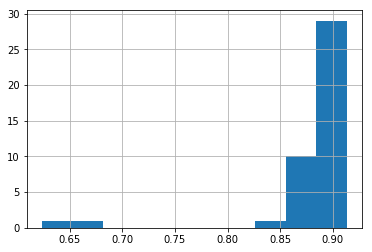

In [54]:
df_train[df_train.A2.notnull()][flag].hist()

In [48]:
df_train.var()

A1       102.628093
A2         0.000000
A3       178.171600
A4      2831.810087
A6        45.464875
A8         7.203428
A10        0.819384
A12        0.837933
A13        0.000006
A15        0.928599
A17        1.964051
A18        0.000007
A19     2548.035606
A21       24.765865
A22        0.136273
A23        0.018670
A27        9.268922
B1     11050.372675
B2         0.150998
B3         0.000007
B6        83.941984
B8        18.821678
B12    42403.110103
B13        0.000067
B14      676.957667
收率         0.000954
dtype: float64

In [55]:
def sum_transform(group):
    group['sum_data1']=group.data1.sum()
    group['sum_data2']=group.data2.sum()
    return group

In [57]:
df.groupby('key').apply(sum_transform)

,key,data1,data2,sum_data1,sum_data2
0,A,0,5,3,8
1,B,1,0,5,7
2,C,2,3,7,12
3,A,3,3,3,8
4,B,4,7,5,7
5,C,5,9,7,12


In [33]:
df.describe()

NameError: name 'df' is not defined

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
key      6 non-null object
data1    6 non-null int64
data2    6 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 200.0+ bytes


In [91]:
df.loc[:,3]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [3] of <class 'int'>

In [80]:
df.skew()

data1    0.000000
data2    0.081679
dtype: float64

In [61]:
df.to_csv('我们.csv', index=False)

In [62]:
os.listdir()

['.idea',
 '.ipynb_checkpoints',
 'data',
 'data_analysis.ipynb',
 'data_analysis.py',
 'Data_analysis_interpret.md',
 'jinnan_round1_submit_20181227.csv',
 'jinnan_round1_testA_20181227.csv',
 'jinnan_round1_train_20181227.csv',
 '我们.csv']

In [73]:
dd = pd.read_csv('./我们.csv', encoding='utf-8', engine='python')

In [139]:
i = 'dfdfd'

In [143]:
[j for j in i]

['d', 'f', 'd', 'f', 'd']

[0, 1, 2, 3, 4, 5, 6, 7]